In [60]:
!pip3 install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os                                        #to access files in the folder
import cv2
# from google.colab.patches import cv2_imshow    #to open image in another window
from PIL import Image                            #Pillow remains an important tool for understanding and dealing with images like image processing
from sklearn.model_selection import train_test_split

In [64]:
raveling_files = os.listdir('/content/drive/MyDrive/classification_problem/train/Raveling')           #Return a list containing the names of the files in the directory.
non_raveling_files = os.listdir('/content/drive/MyDrive/classification_problem/train/Non_raveling')    #os.listdir() method in python is used to get the list of all files and directories in the specified directory.

In [65]:
print(raveling_files[0:10])
print(non_raveling_files[0:10])

['image671.jpg', 'image672.jpg', 'image670.jpg', 'image661.jpg', 'image673.jpg', 'image669.jpg', 'image682.jpg', 'image658.jpg', 'image688.jpg', 'image690.jpg']
['image96.jpg', 'image99.jpg', 'image71.jpg', 'image90.jpg', 'image95.jpg', 'image82.jpg', 'image7.jpg', 'image660.jpg', 'image687.jpg', 'image674.jpg']


In [66]:
working_directory_path = os.getcwd()         #current working directory

In [67]:
print(working_directory_path)

/content


In [68]:
pwd #present working directory

'/content'

In [69]:
len(raveling_files)

300

In [70]:
len(non_raveling_files)

300

In [71]:
raveling_lebels = [1]*300
non_raveling_lebels = [0]*300

In [72]:
print(raveling_lebels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [73]:
print(non_raveling_lebels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [74]:
lebels = raveling_lebels+non_raveling_lebels

In [75]:
print(lebels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

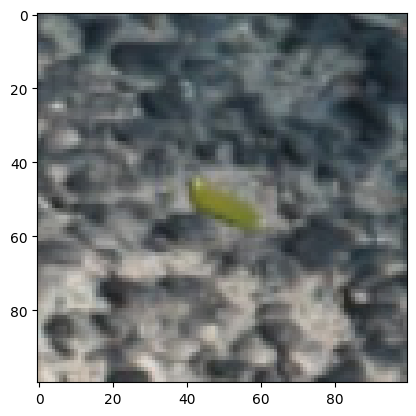

In [76]:
img = mpimg.imread('/content/drive/MyDrive/classification_problem/train/Raveling/image11.jpg') #reading image as a numpy array
plt.imshow(img)   #Display data as an image

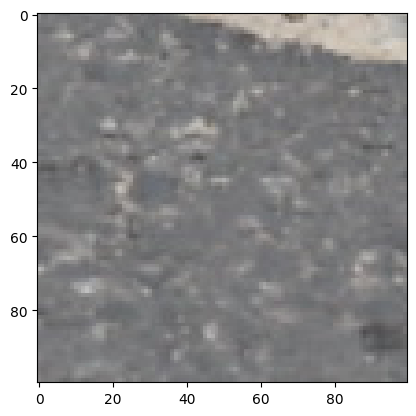

In [77]:
img2 = mpimg.imread('/content/drive/MyDrive/classification_problem/train/Non_raveling/image179.jpg')
plt.imshow(img2)

In [78]:
raveling_path = '/content/drive/MyDrive/classification_problem/train/Raveling/'

In [79]:
for i in range(0,10):
    raveling_file_name = raveling_files[i]
    image = Image.open(raveling_path+raveling_file_name)
    width,height = image.size
    print(width,height)

100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100


In [80]:
data= []

In [81]:
raveling_path = '/content/drive/MyDrive/classification_problem/train/Raveling/'
for raveling in raveling_files:
    image = Image.open(raveling_path+raveling)
    image = np.array(image)
    image = image.flatten() / 255.0
    data.append(image)

In [82]:
len(data)

300

In [83]:
non_raveling_path  = '/content/drive/MyDrive/classification_problem/train/Non_raveling/'
for non_raveling in non_raveling_files:
    image = Image.open(non_raveling_path+non_raveling)
    image = np.array(image)
    image = image.flatten() / 255.0
    data.append(image)

In [84]:
len(data)

600

In [85]:
len(lebels)

600

In [86]:
print(data[0])   #each image has now been converted into a numpy array

[0.40784314 0.42352941 0.42745098 ... 0.67843137 0.65490196 0.6       ]


In [87]:
data[0].shape  #shape of each image

(30000,)

In [88]:
X = np.array(data)              #since data was list, we need to convert it into a numpy array
Y = np.array(lebels)            #same for the lebels

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .2,random_state = 2)

In [90]:
X_train.shape

(480, 30000)

In [91]:
X_test.shape

(120, 30000)

In [92]:
Y_train.shape

(480,)

In [93]:
Y_test.shape

(120,)

In [94]:
X_train[0]

array([0.38039216, 0.36470588, 0.35294118, ..., 0.55294118, 0.55294118,
       0.55294118])

In [95]:
from sklearn.linear_model import LogisticRegression


In [96]:
logisticRegr = LogisticRegression()


In [101]:
logisticRegr.fit(X_train, Y_train)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, Y_train)

ann_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500)
ann_model.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500)

In [150]:
# Evaluate the models

y_train_pred_lr = lr_model.predict(X_train)
y_train_pred_ann = ann_model.predict(X_train)

train_accuracy_lr = accuracy_score(Y_train, y_train_pred_lr)
train_accuracy_ann = accuracy_score(Y_train, y_train_pred_ann)

y_val_pred_lr = lr_model.predict(X_test)
y_val_pred_ann = ann_model.predict(X_test)

val_accuracy_lr = accuracy_score(Y_test, y_val_pred_lr)
val_accuracy_ann = accuracy_score(Y_test, y_val_pred_ann)

print(f"LR Training Accuracy: {train_accuracy_lr:.4f}")
print(f"ANN Training Accuracy: {train_accuracy_ann:.4f}")
print(f"LR Test Accuracy: {val_accuracy_lr:.4f}")
print(f"ANN Test Accuracy: {val_accuracy_ann:.4f}")


LR Training Accuracy: 1.0000
ANN Training Accuracy: 0.7479
LR Test Accuracy: 0.6333
ANN Test Accuracy: 0.6583


In [151]:
final_image_files = os.listdir('/content/drive/MyDrive/classification_problem/test')

In [152]:
final_image_files[1]

'10.jpg'

In [153]:
test_data =[]
final_file_path = '/content/drive/MyDrive/classification_problem/test/'
for final in final_image_files:
    image = Image.open(final_file_path+final)
    image = np.array(image)
    image = image.flatten() / 255.0
    test_data.append(image)

In [154]:
test_data[0]

array([0.58039216, 0.58039216, 0.57254902, ..., 0.55686275, 0.55294118,
       0.54509804])

In [155]:
#Predict the classes for the test dataset

test_predictions_lr = lr_model.predict(test_data)
test_predictions_ann = ann_model.predict(test_data)

In [156]:
print(test_predictions_lr)

[0 1 0 0 0 0 1 0 0 1]


In [157]:
print(test_predictions_ann)

[1 1 0 1 1 1 1 1 1 1]
